# ¿Cómo viajan los turistas en España?

In [16]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

# Hipotesis: 


### ¿El turismo en España sigue una fuerte estacionalidad, con picos en verano y descensos en invierno? Datos

### ¿El turismo en España es mas de Turismo o Excursion? DATOS 2016 A 2025

### ¿España es un pais en el que el viaje por negocios va en aumento? 

### ¿Los turistas de ciertos países gastan más dinero en España que otros? Desde 2015 a 2025


# ¿El turismo en España sigue una fuerte estacionalidad, con picos en verano y descensos en invierno?

In [17]:
turismo = pd.read_excel("./data/tourism_dataset.xlsx") #Importa Dataset de la carpeta src
turismo=pd.DataFrame(turismo) #Convierte a formato Dataframe

#Creo un dataframe aparte para limpiar el nombre de las columnas
reemplazo_comunidad=turismo[" "].str.split(expand=True)
reemplazo_comunidad= reemplazo_comunidad.drop(columns = [0, 2, 3, 4])
#reemplazo_comunidad

#Union entre el datafram principal y el datafram de nombres limpios
turismo= pd.concat([turismo, reemplazo_comunidad], axis=1)
turismo = turismo.rename(columns={1: 'Comunidad'}) #Renombra la columna recien concatenada
turismo= turismo.drop(columns = [" "]) #Elimina la columna original 

#Numeros y caracteres innecesarios en las fechas
turismo.columns=turismo.columns.str.replace("M", " ")
turismo.columns=turismo.columns.str.replace(".5", "")
turismo.columns=turismo.columns.str.replace(".4", "")
turismo.columns=turismo.columns.str.replace(".3", "")
turismo.columns=turismo.columns.str.replace(".2", "")
turismo.columns=turismo.columns.str.replace(".1", "")

turismo = turismo.set_index("Comunidad") #Nuevo indice seranlos nombres de las comunidades
turismo = turismo.transpose() #Se revierte el orden para poner las fechas como indices

#Convertir los valores a STR para poder reemplazar simbolos y luego convertir a formato numerico
turismo = turismo.astype(str)
turismo = turismo.replace('\\.', '', regex=True)
turismo = turismo.replace(',', '.', regex=True)  # Cambia comas por puntos
turismo = turismo.apply(pd.to_numeric, errors='coerce')

turismo = turismo.loc[:, ~turismo.columns.duplicated()]#Elimina columnas duplicadas
turismo = turismo[~turismo.index.duplicated(keep='first')]

nuevo_índice = pd.to_datetime(turismo.index, format='%Y %m').to_period('M') #Convierto a formato fecha quedandome solo con mes y año.
turismo.index = nuevo_índice #Actualizo el indice en el Dataframe principal
turismo = turismo.sort_index()  # Ordena en ascendente

def estacion(df = turismo, año = 2024, comunidades=("Madrid",), temporadas=("invierno",)): #Funcion para filtrar el Dataframe
    '''
    Filtra el DataFrame principal con:
    - Rango de años.
    - Ciudades Seleccionadas en España.
    - Temporadas Seleccionadas.

    P/ejem: 
    estacion(turismo, (2020, 2024), ["Madrid", "Barcelona"], ("invierno", "primavera"))
    '''
    
    temporada_dict={ 
        "primavera":(3,4,5),
        "verano" : (6,7,8),
        "otoño" : (9,10,11),
        "invierno" : (12, 1, 2)}
    
    meses = sum((temporada_dict[temporada] for temporada in temporadas), ())
    
    if isinstance(comunidades, str):
        comunidades = [comunidades]
        # df = df.to_timestamp()
    filtro = (
        (df.index.strftime('%Y').astype(int) >= año[0]) &
        (df.index.strftime('%Y').astype(int) <= año[1]) &
        (df.index.strftime('%m').astype(int).isin(meses))
    )
    
    # Devuelve el DataFrame filtrado para las comunidades seleccionadas
    return df.loc[filtro, comunidades]


total_nacional = ('Nacional') #Condensa el total por año de toda españa 

#Media y mediana nacional por año desde 1990 hasta 2024
media_nacional = turismo['Nacional'].groupby(turismo.index.year).mean()
mediana_nacional = turismo['Nacional'].groupby(turismo.index.year).median()

#Datos COVID
# Analisis de turismo, pre, durante y post covid
pre_covid = estacion(turismo, año=(2017, 2019), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #Muestra turismo pre covid en España
covid = estacion(turismo, año=(2020, 2021), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #Muestra turismo durante el covid en España
post_covid = estacion(turismo, año=(2022, 2024), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #Muestra turismo post covid en España
covid_general = estacion(turismo, año=(2019, 2024), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #Muestra turismo post covid en España

#Muestras Verano
verano_nacional = estacion(turismo, año=(1999, 2023), comunidades=total_nacional, temporadas=("verano",)) #España completa

#Muestras Invierno
invierno_nacional = estacion(turismo, año=(1999, 2023), comunidades=total_nacional, temporadas=("invierno",)) #España completa

año1999=estacion(turismo, año=(1999, 1999), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #España completa
año2024=estacion(turismo, año=(2024, 2024), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #España completa

In [18]:
verano_nacional

Comunidad,Nacional
1999-06,5834331
1999-07,6415298
1999-08,6986211
2000-06,5806706
2000-07,6374389
...,...
2022-07,12292936
2022-08,12889916
2023-06,11535550
2023-07,12680483


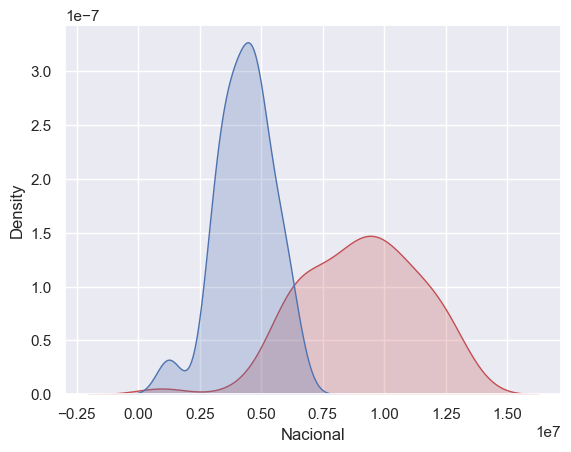

In [19]:
sb.set_theme(style="darkgrid")
sb.kdeplot(verano_nacional['Nacional'], fill=True, color="r")
sb.kdeplot(invierno_nacional['Nacional'], fill=True, color="b")
plt.show()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# ¿El turismo en España es mas de Turismo o Excursion? DATOS 2016 A 2025

In [21]:
tipologia = pd.read_excel("./data/tipologia_viaje.xlsx") #Importa el archivo
tipologia.columns=tipologia.columns.str.replace("M", " ")#Reemplaza la M de las fechas por un espacio
pd.options.display.float_format = '{:.1f}'.format #sE modifican los valores que tenian anotacion cientifica y confirma el formato float.
tipologia=tipologia.set_index(" ")
tipologia = tipologia[tipologia.columns[::-1]]
tipologia=tipologia.drop(["2015 10", "2015 11", "2015 12"], axis=1)
tipologia=tipologia.transpose()
tipologia = tipologia.apply(pd.to_numeric, errors='coerce')

nuevo_índice_tipologia = pd.to_datetime(tipologia.index, format='%Y %m').to_period('M') #Convierto a formato fecha quedandome solo con mes y año.
tipologia.index = nuevo_índice_tipologia #Actualizo el indice en el Dataframe principal
tipologia = tipologia.sort_index()  # Ordena en ascendente
tipologia.columns = tipologia.columns.str.strip()

tipologia_2=tipologia.drop(["Acumulado en lo que va de año", "Tasa de variación anual", "Tasa de variación acumulada"], axis=1)
tipologia_2 = tipologia_2.iloc[:, 1:]
tipologia_2.columns.values[1] = "Datos Turista"  # Cambia la segunda columna
tipologia_2.columns.values[3] = "Datos Excursionista"
tipologia_2=tipologia_2.drop(["Turista", "Excursionista"], axis=1)
#tipologia_2 = tipologia_2[["Datos Turista", "Datos Excursionista"]]  # Selecciona solo las columnas útiles


In [22]:
tipologia_2

,Datos Turista,Datos Excursionista
2016-01,3526537.0,2606782.0
2016-02,3678726.0,2576136.0
2016-03,4627206.0,3057296.0
2016-04,6086327.0,3168124.0
2016-05,7111154.0,3298143.0
...,...,...
2024-09,9602015.0,3708145.0
2024-10,8961932.0,3957754.0
2024-11,5670219.0,3383411.0
2024-12,5264375.0,3515575.0


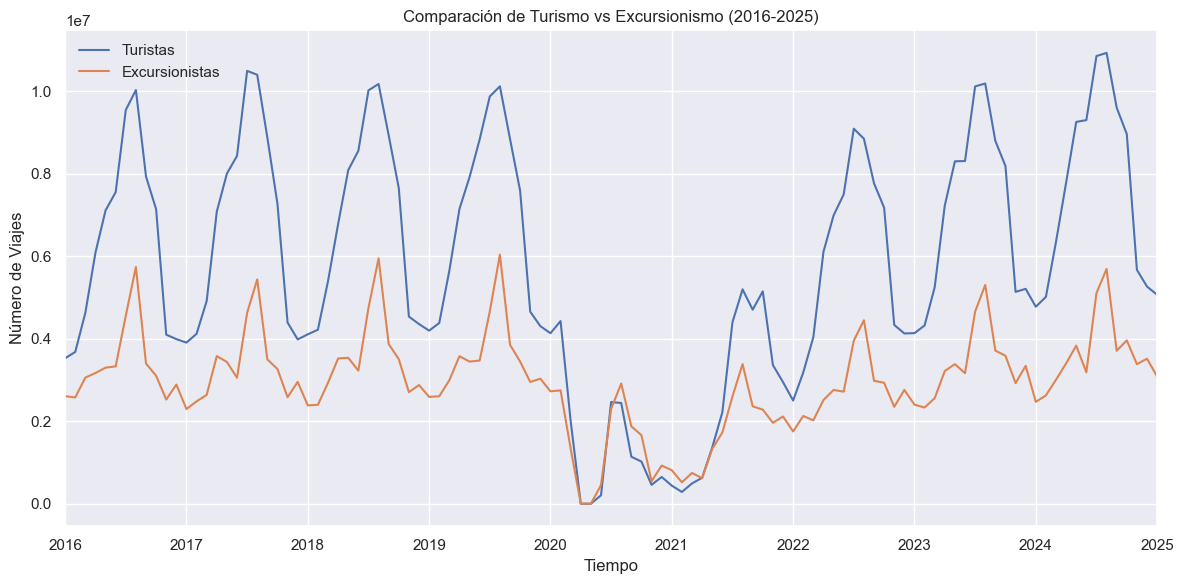

In [24]:
tipologia_2.plot(figsize=(12, 6))
plt.title("Comparación de Turismo vs Excursionismo (2016-2025)")
plt.xlabel("Tiempo")
plt.ylabel("Número de Viajes")
plt.legend(["Turistas", "Excursionistas"], frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
total_turistas = tipologia_2["Datos Turista"].sum()
total_excursionistas = tipologia_2["Datos Excursionista"].sum()

print(f"Total de turistas (2016-2025): {total_turistas:,.0f}")
print(f"Total de excursionistas (2016-2025): {total_excursionistas:,.0f}")


Total de turistas (2016-2025): 629,267,722
Total de excursionistas (2016-2025): 323,184,160


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# ¿España es un pais en el que el viaje por negocios va en aumento?

In [ ]:
motivo_viaje = pd.read_excel("./data/motivo_viaje.xlsx")
motivo_viaje.columns=motivo_viaje.columns.str.replace("M", " ")#Reemplaza la M de las fechas por un espacio
motivo_viaje = motivo_viaje.transpose()
motivo_viaje.columns = motivo_viaje.iloc[0].astype(str).str.strip()  #Convierte valores string y elimina los espacios
motivo_viaje = motivo_viaje.drop(motivo_viaje.index[0])  #Elimina la fila con los nombres
#motivo_viaje.columns
#motivo_viaje

motivo_viaje.columns.values[5] = "Total Ocio"
motivo_viaje.columns.values[10] = "Total Negocios"
motivo_viaje.columns.values[15] = "Total Otros motivos"

negocios = motivo_viaje[['Total Negocios']].copy()
negocios = negocios.transpose()
negocios = negocios[negocios.columns[::-1]]
negocios

,2015 10,2015 11,2015 12,2016 01,2016 02,2016 03,2016 04,2016 05,2016 06,2016 07,...,2024 04,2024 05,2024 06,2024 07,2024 08,2024 09,2024 10,2024 11,2024 12,2025 01
,,,,,,,,,,,,,,,,,,,,,
Total Negocios,469568,393014,301888,347876.0,441059.0,387761.0,459199.0,478728.0,442129.0,303483.0,...,517288.0,520685.0,578622.0,338706.0,152920.0,567884.0,525253.0,463667.0,287335.0,244325.0


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# ¿Los turistas de ciertos países gastan más dinero en España que otros? Desde 2015 a 2025

In [ ]:
pais = pd.read_excel("./data/Gasto_segun_paisxlsx.xlsx")
pais.columns=pais.columns.str.replace("M", " ")#Reemplaza la M de las fechas por un espacio
pais=pais.set_index(" ")
pais = pais.transpose()
pais = pais.apply(pd.to_numeric, errors='coerce')

In [ ]:
pais

,Gasto total,Total,Dato base,Reino Unido,Dato base,Países Nórdicos,Dato base,Resto del Mundo,Dato base,Alemania,...,Países Nórdicos,Dato base,Resto del Mundo,Dato base,Alemania,Dato base,Francia,Dato base,Italia,Dato base
2025 01,NaN,NaN,7132.04,NaN,1096.09,NaN,618.36,NaN,3798.51,NaN,...,NaN,10.43,NaN,8.48,NaN,10.65,NaN,8.24,NaN,6.02
2024 12,NaN,NaN,7590.34,NaN,1096.36,NaN,628.90,NaN,3918.73,NaN,...,NaN,11.68,NaN,9.18,NaN,10.26,NaN,7.94,NaN,10.11
2024 11,NaN,NaN,7707.67,NaN,1156.75,NaN,687.40,NaN,3996.30,NaN,...,NaN,10.32,NaN,7.19,NaN,9.39,NaN,7.91,NaN,6.02
2024 10,NaN,NaN,11898.70,NaN,2124.25,NaN,785.42,NaN,6000.79,NaN,...,NaN,8.06,NaN,6.79,NaN,7.56,NaN,6.51,NaN,6.67
2024 09,NaN,NaN,12613.05,NaN,2451.03,NaN,598.42,NaN,6441.72,NaN,...,NaN,7.20,NaN,6.48,NaN,7.30,NaN,7.62,NaN,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016 02,NaN,NaN,3706.27,NaN,690.25,NaN,473.38,NaN,1629.28,NaN,...,NaN,8.78,NaN,8.09,NaN,8.53,NaN,5.61,NaN,6.80
2016 01,NaN,NaN,3737.26,NaN,608.99,NaN,493.27,NaN,1739.33,NaN,...,NaN,9.35,NaN,8.91,NaN,9.79,NaN,6.88,NaN,6.65
2015 12,NaN,NaN,3773.27,NaN,731.74,NaN,426.94,NaN,1740.17,NaN,...,NaN,9.68,NaN,8.95,NaN,10.18,NaN,6.30,NaN,8.30
2015 11,NaN,NaN,3872.84,NaN,659.06,NaN,469.27,NaN,1773.86,NaN,...,NaN,9.71,NaN,8.48,NaN,8.59,NaN,6.51,NaN,5.31


In [ ]:
pais.columns

Index(['Gasto total', '    Total', '        Dato base', '    Reino Unido',
       '        Dato base', '    Países Nórdicos', '        Dato base',
       '    Resto del Mundo', '        Dato base', '    Alemania',
       '        Dato base', '    Francia', '        Dato base', '    Italia',
       '        Dato base', 'Gasto medio por persona', '    Total',
       '        Dato base', '    Reino Unido', '        Dato base',
       '    Países Nórdicos', '        Dato base', '    Resto del Mundo',
       '        Dato base', '    Alemania', '        Dato base', '    Francia',
       '        Dato base', '    Italia', '        Dato base',
       'Gasto medio diario por persona', '    Total', '        Dato base',
       '    Reino Unido', '        Dato base', '    Países Nórdicos',
       '        Dato base', '    Resto del Mundo', '        Dato base',
       '    Alemania', '        Dato base', '    Francia', '        Dato base',
       '    Italia', '        Dato base', 'Duración media 

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++